In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [ ]:
assert False, "Dont reun this cell"
homebuyerDF = pd.read_csv('HomeBuyerInfo.csv')

homebuyerDF["LTV"] = homebuyerDF["LoanAmount"]/homebuyerDF["AppraisedValue"]
homebuyerDF["MonthlyDebt"] = homebuyerDF["CarPayment"] + homebuyerDF["CreditCardPayment"] + homebuyerDF["MonthlyMortgagePayment"]
homebuyerDF["DTI"] = homebuyerDF["MonthlyDebt"]/homebuyerDF["GrossMonthlyIncome"]
homebuyerDF["FEDTI"] = homebuyerDF["MonthlyMortgagePayment"]/homebuyerDF["GrossMonthlyIncome"]

#Add Approval Column
homebuyerDF["Approved"] = ""

"""
A potential buyer should be approved for home purchases iff:
CreditScore >= 640
LTV <= 0.8 is preferred
LTV > .8 and < .95 is approved but high risk (high interest rate)
DTI {
    .43 is hard cap
    .36 is soft cap
}

FEDTI <= .28

"""
#Approval is Y, R-LTV, R-DTI, N for HomebuyerDF
for i, row in homebuyerDF.iterrows():
    if (
        row["CreditScore"] >= 640 and
        row["LTV"] <= .8 and
        row["DTI"] <= .36 and
        row["FEDTI"] <= .28
    ):
        homebuyerDF.at[i, "Approved"] = "Y"
    elif (
        row["CreditScore"] >= 640 and
        row["LTV"] <= .95 and
        row["DTI"] <= .36 and
        row["FEDTI"] <= .28
    ):
        homebuyerDF.at[i, "Approved"] = "R-LTV"
    elif (
        row["CreditScore"] >= 640 and
        row["LTV"] <= .8 and
        row["DTI"] <= .43 and
        row["FEDTI"] <= .28
    ):
        homebuyerDF.at[i, "Approved"] = "R-DTI"
    else:
        homebuyerDF.at[i, "Approved"] = "N"

        
#Save to CSV
homebuyerDF.to_csv("AnalyzedHomeBuyerInfo.csv", index=False)



In [37]:
homebuyerDF = pd.read_csv('AnalyzedHomeBuyerInfo.csv')

In [49]:

approvedDF = homebuyerDF[homebuyerDF["Approved"] == "Y"].drop(columns=["Approved", "ID"])
ltv_ristDF = homebuyerDF[homebuyerDF["Approved"] == "R-LTV"].drop(columns=["Approved", "ID"])
dti_riskDF = homebuyerDF[homebuyerDF["Approved"] == "R-DTI"].drop(columns=["Approved", "ID"])
not_approvedDF = homebuyerDF[homebuyerDF["Approved"] == "N"].drop(columns=["Approved", "ID"])



homebuyerDF["Approved"].value_counts()



Approved
N        7234
R-LTV    1417
Y        1106
R-DTI     243
Name: count, dtype: int64

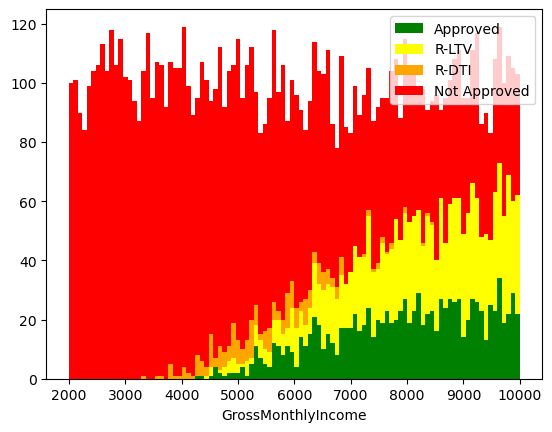

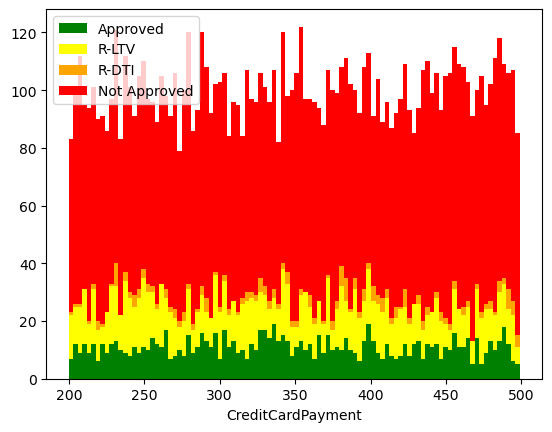

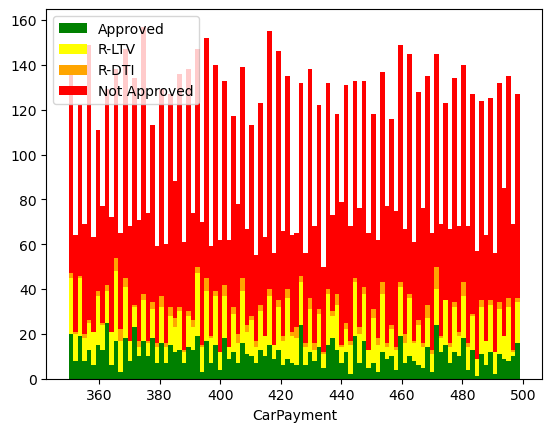

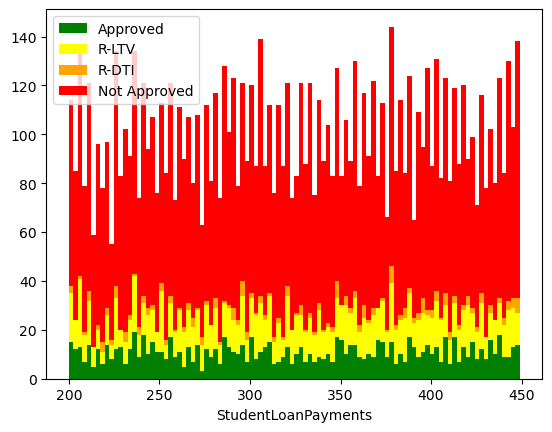

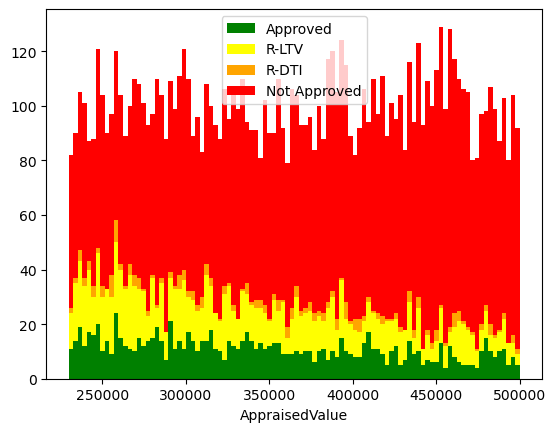

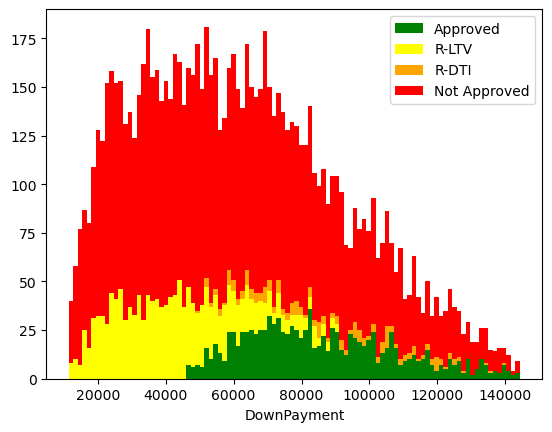

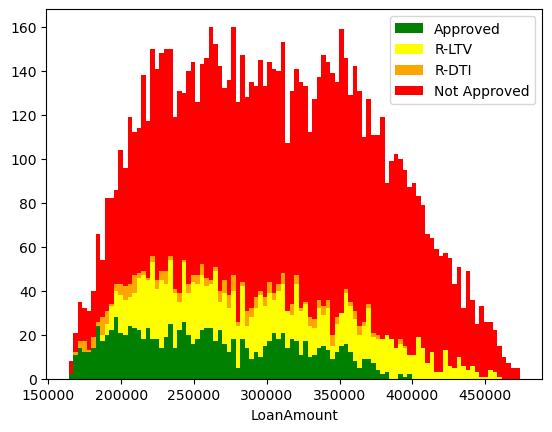

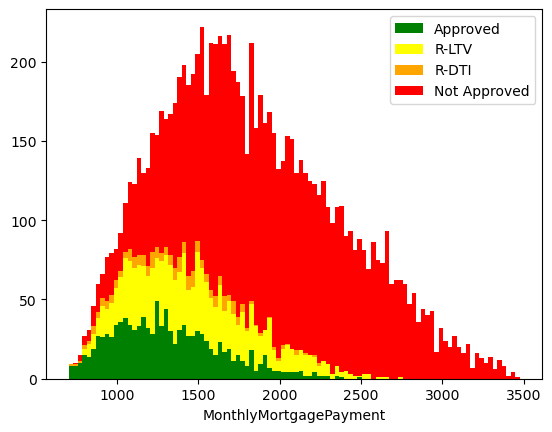

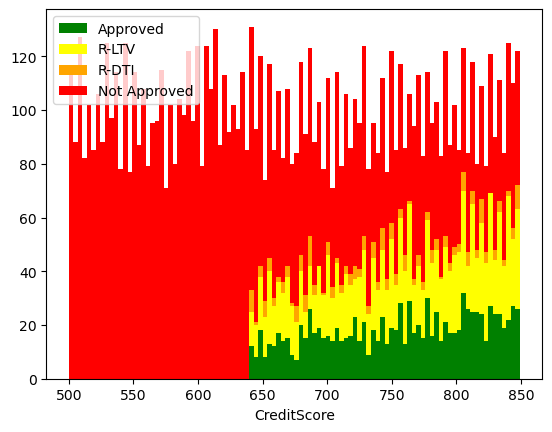

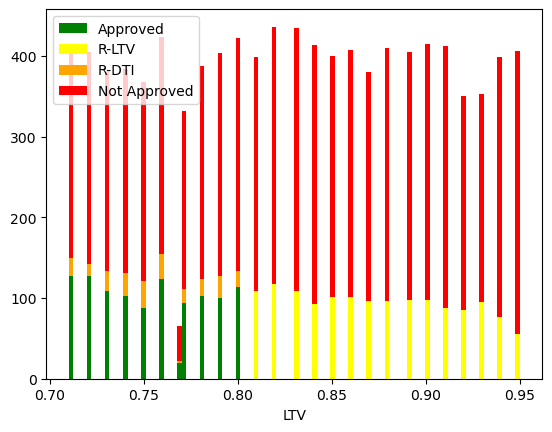

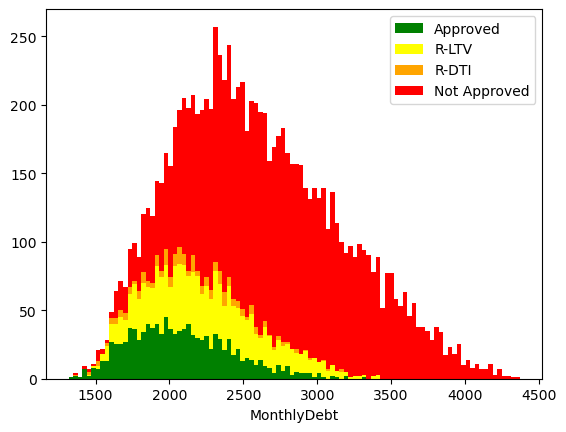

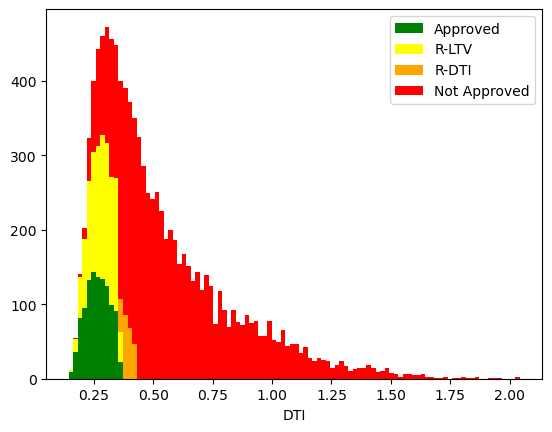

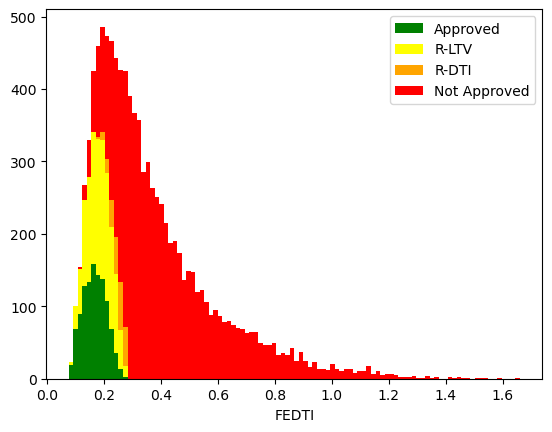

In [78]:
#Make a historgram graph of homebuyerDF with color of Approved on one graph
for i in range(1, len(homebuyerDF.columns) - 1):
    colName = homebuyerDF.columns[i]
    plt.hist([approvedDF[colName], ltv_ristDF[colName], dti_riskDF[colName], not_approvedDF[colName]], bins=100, stacked=True, color=["green", "yellow", "orange", "red"])
    plt.legend(["Approved", "R-LTV", "R-DTI", "Not Approved"])
    plt.xlabel(colName)
    plt.show()

       GrossMonthlyIncome  CreditCardPayment   CarPayment  \
count         7234.000000        7234.000000  7234.000000   
mean          5267.845452         352.267902   425.024053   
std           2198.370853          87.108939    43.303740   
min           2000.000000         200.000000   350.000000   
25%           3417.000000         278.000000   387.000000   
50%           4917.000000         353.000000   425.000000   
75%           6899.250000         430.000000   463.000000   
max           9999.000000         499.000000   499.000000   

       StudentLoanPayments  AppraisedValue    DownPayment     LoanAmount  \
count          7234.000000     7234.000000    7234.000000    7234.000000   
mean            325.698092   372931.011612   61631.793665  311299.217947   
std              71.902605    77252.995063   29974.007281   69930.824226   
min             200.000000   230023.000000   11511.550000  164058.280000   
25%             264.000000   305672.000000   37108.835000  254904.1025

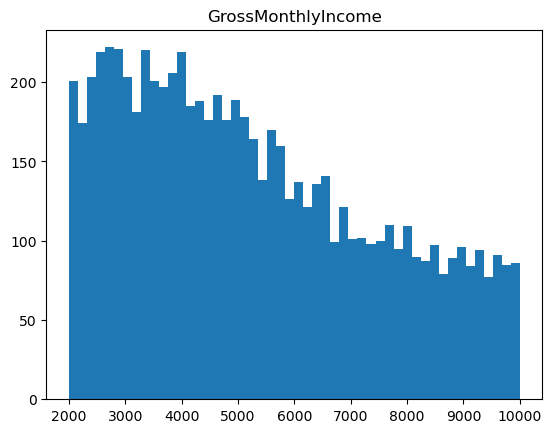

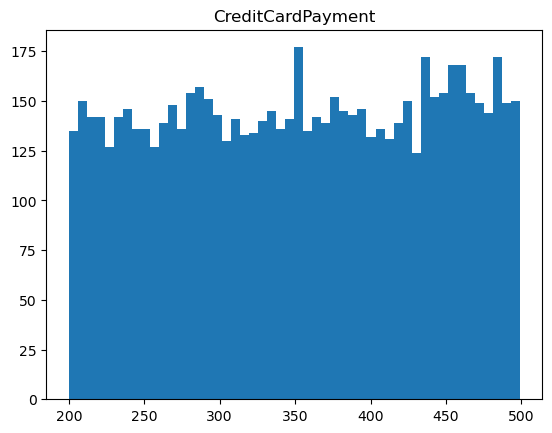

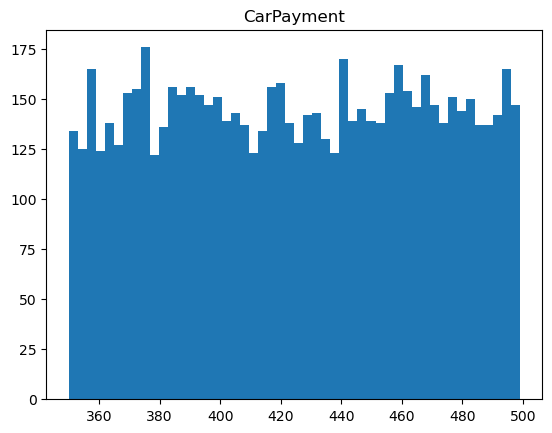

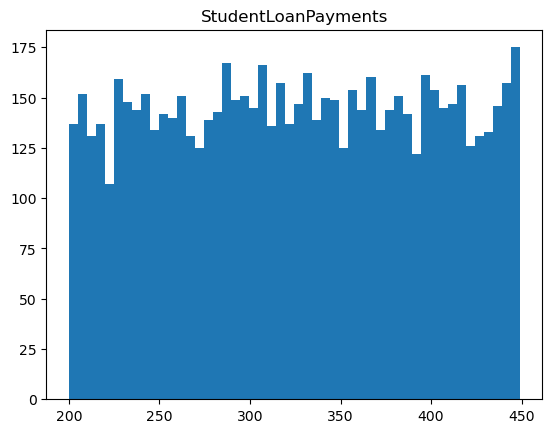

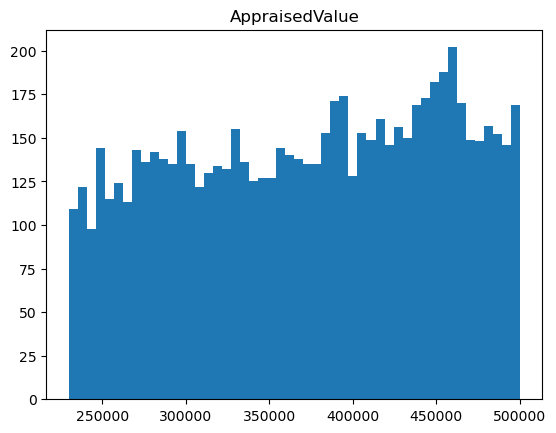

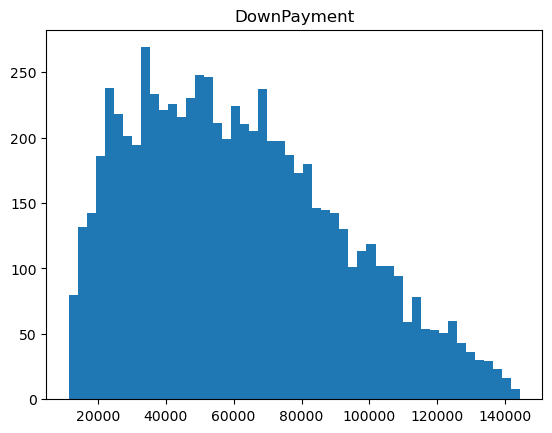

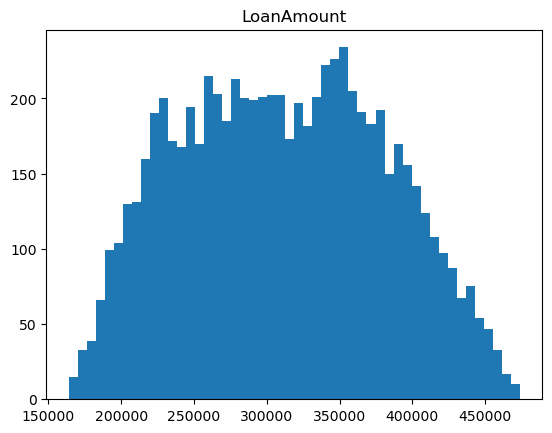

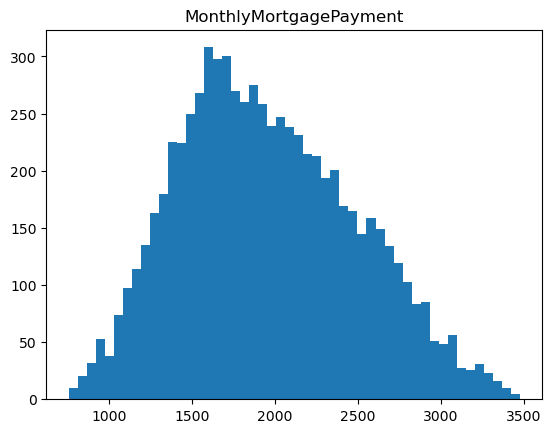

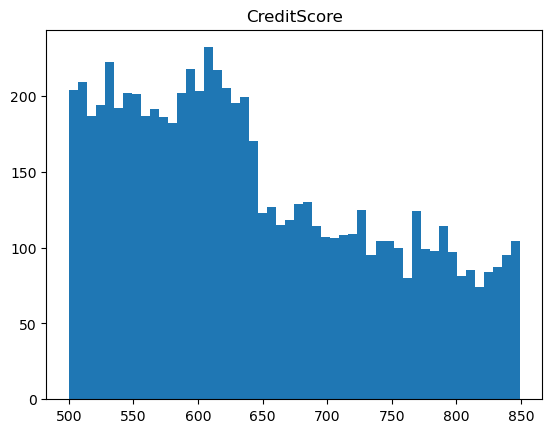

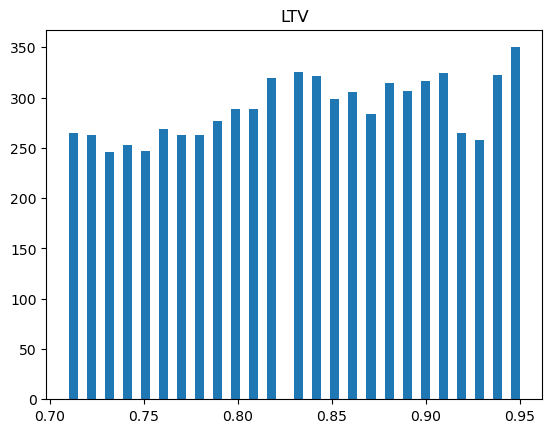

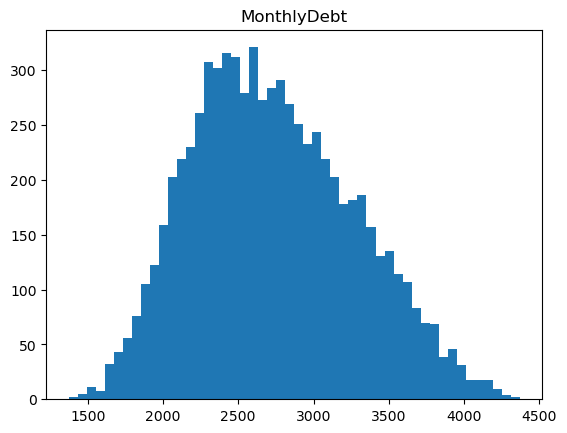

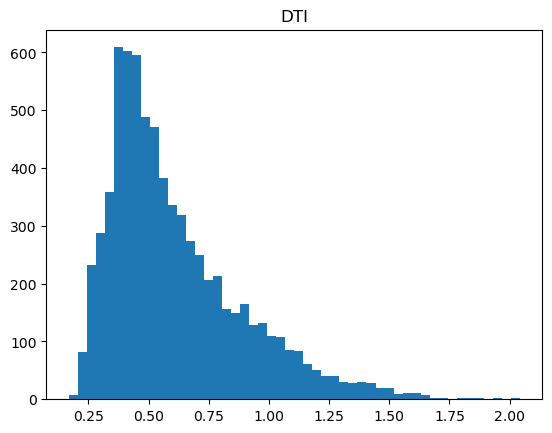

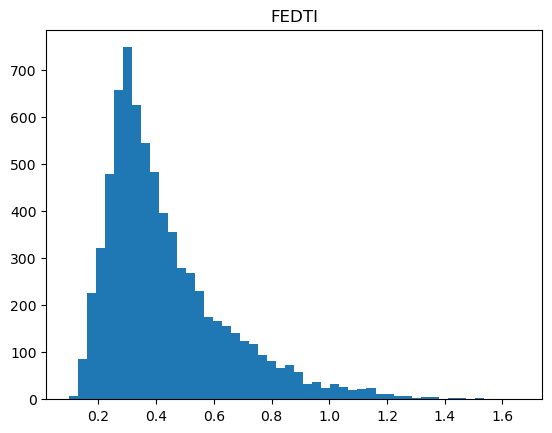

In [59]:
print(not_approvedDF.describe())

#Histograms for each column
for col in not_approvedDF.columns:
    plt.hist(not_approvedDF[col], bins=50)
    plt.title(col)
    plt.show()

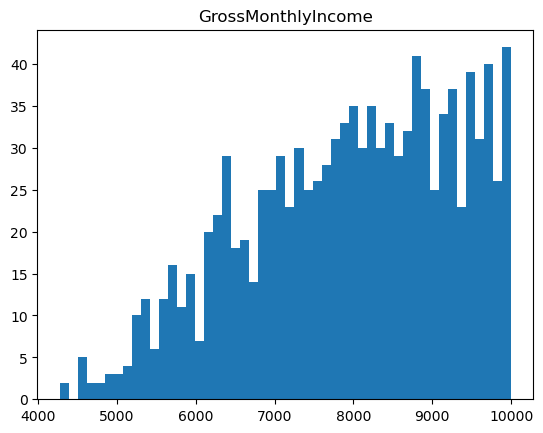

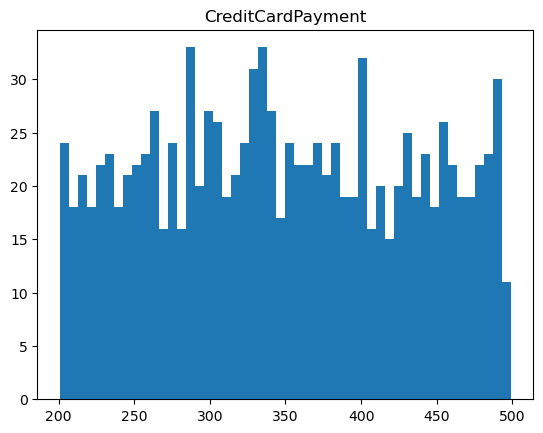

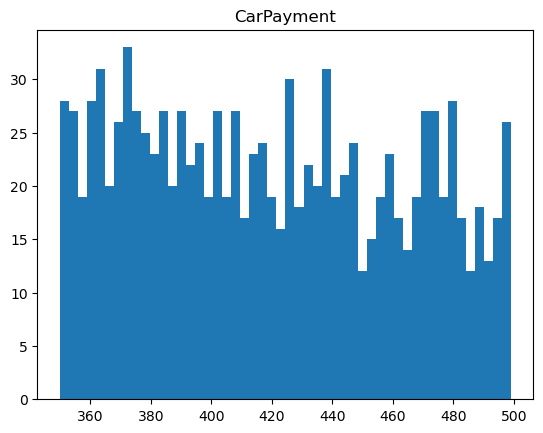

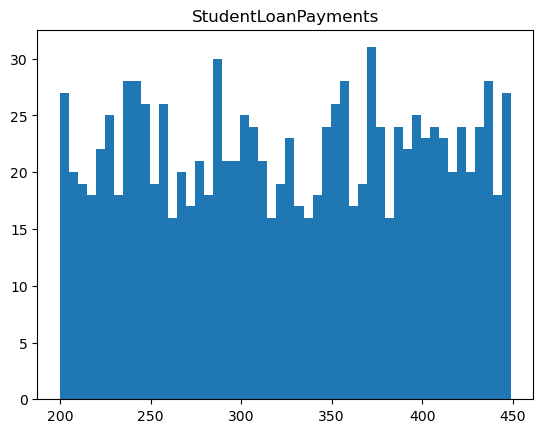

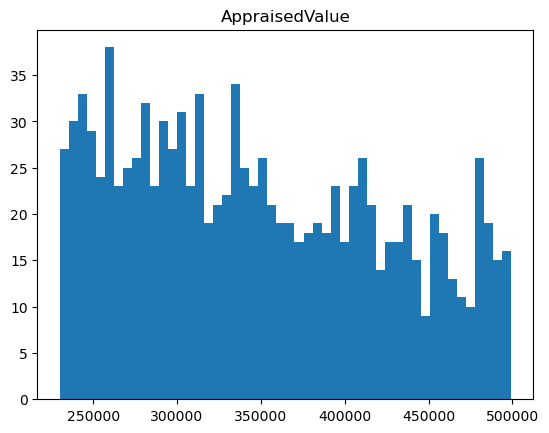

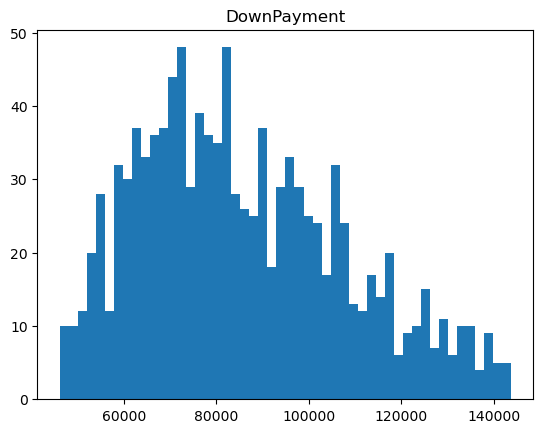

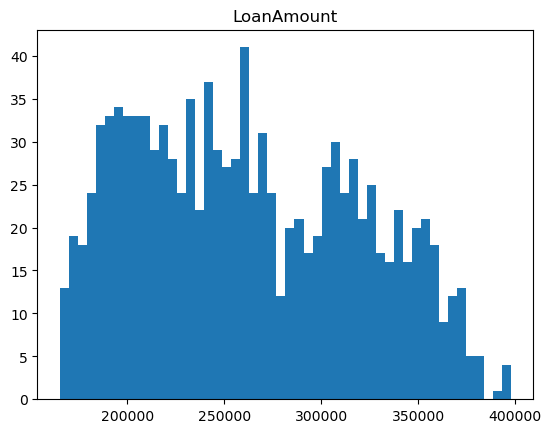

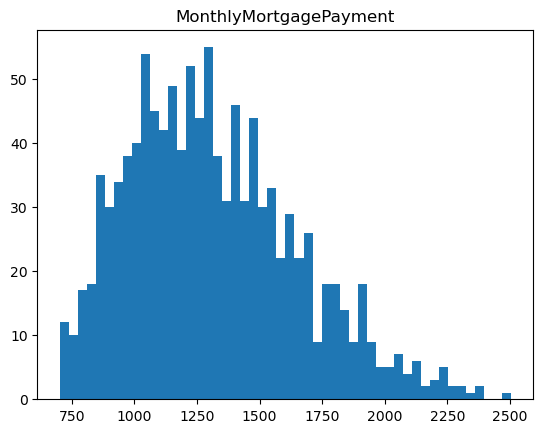

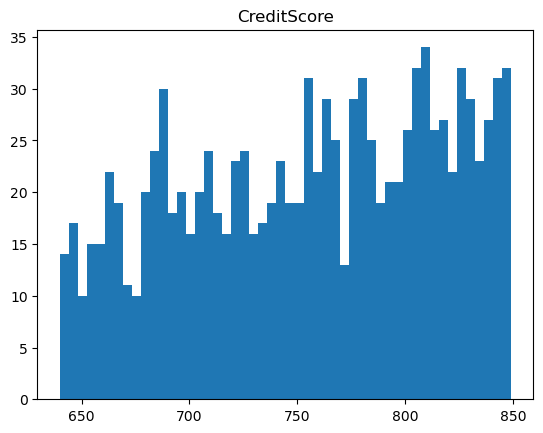

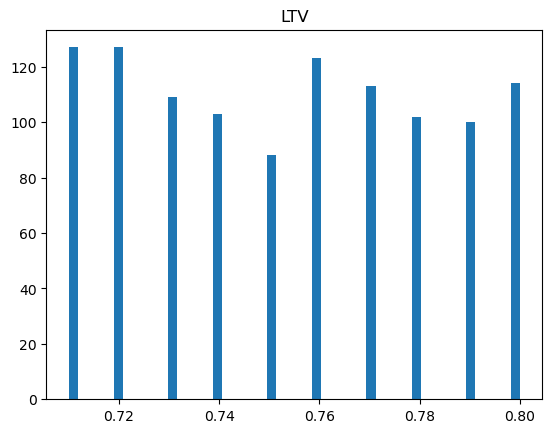

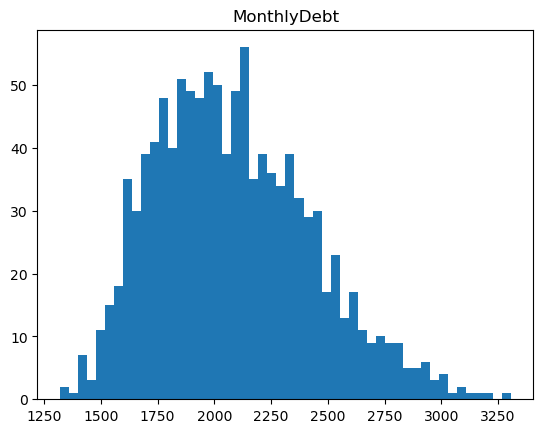

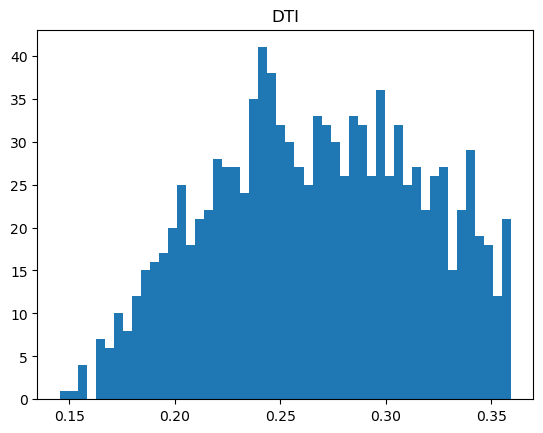

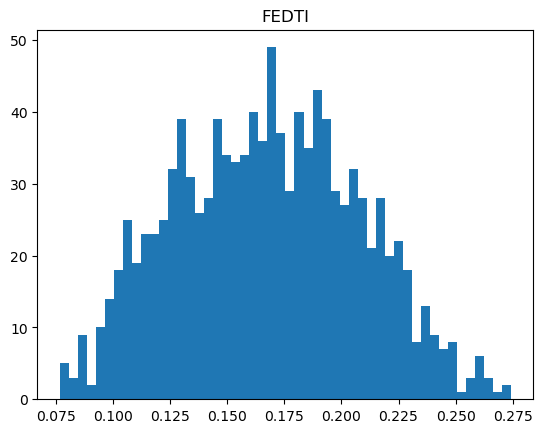

In [60]:
approvedDF.describe()
#Histograms for each column
for col in approvedDF.columns:
    plt.hist(approvedDF[col], bins=50)
    plt.title(col)
    plt.show()


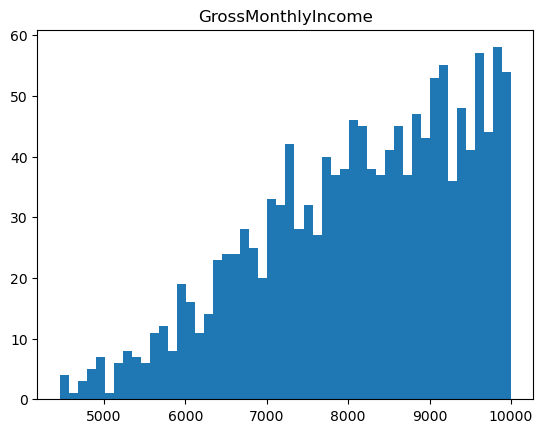

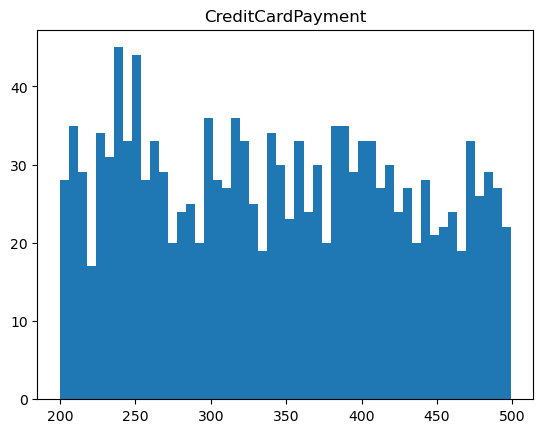

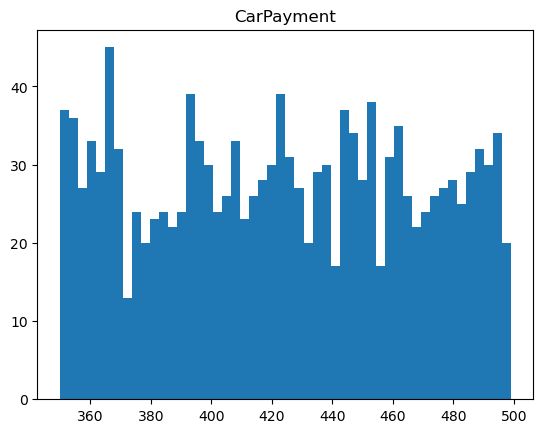

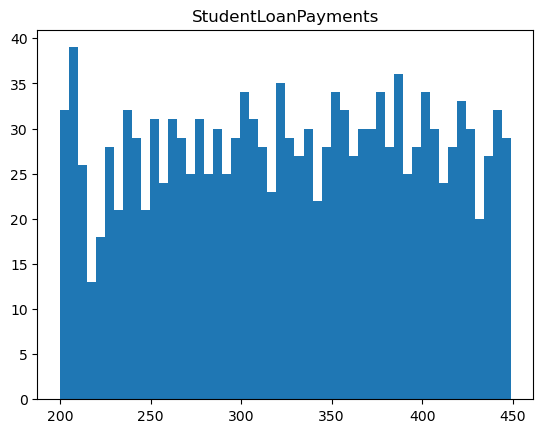

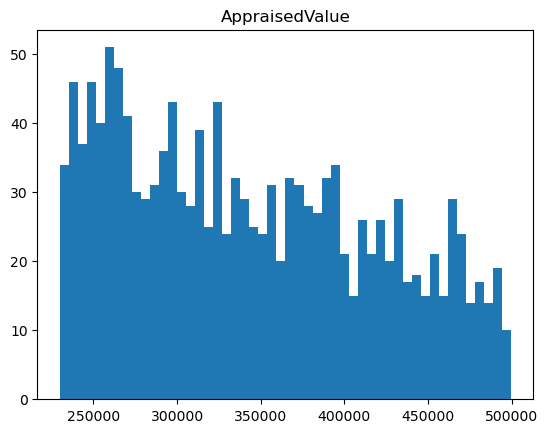

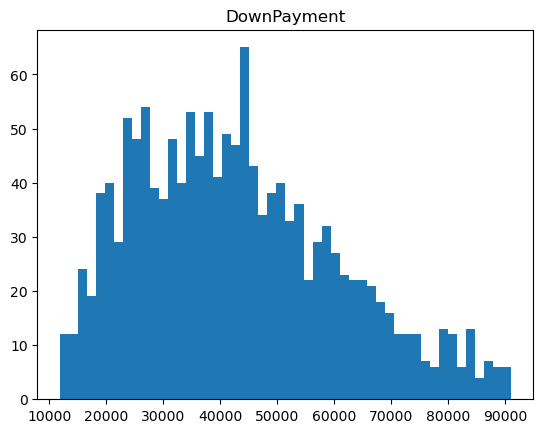

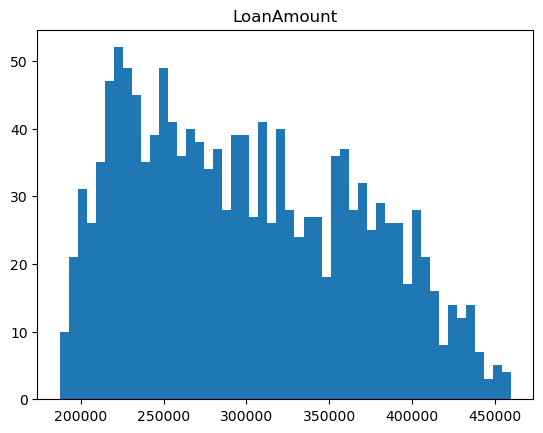

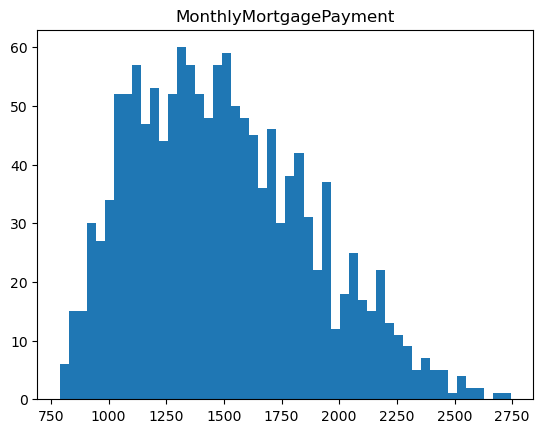

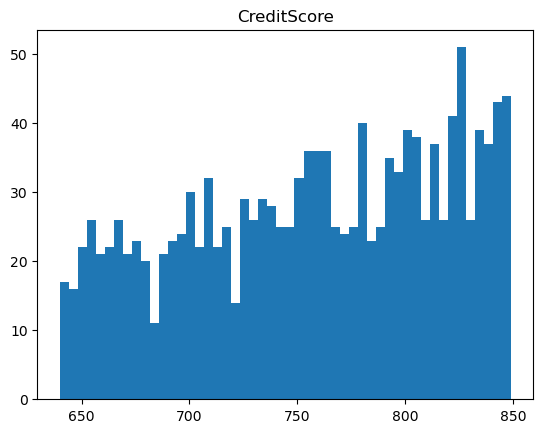

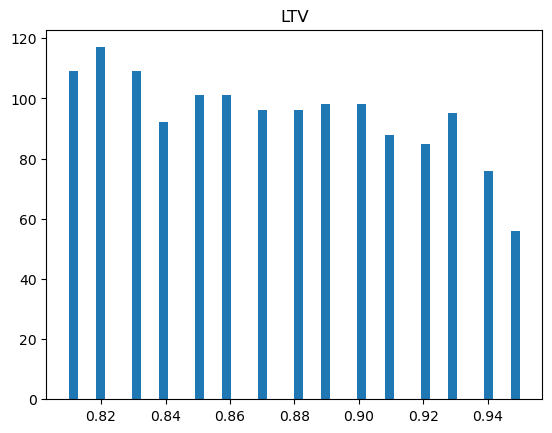

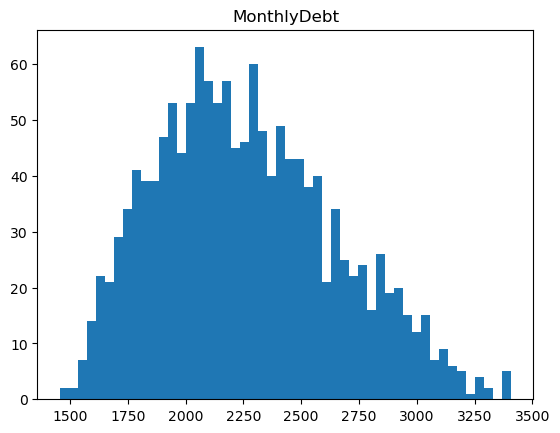

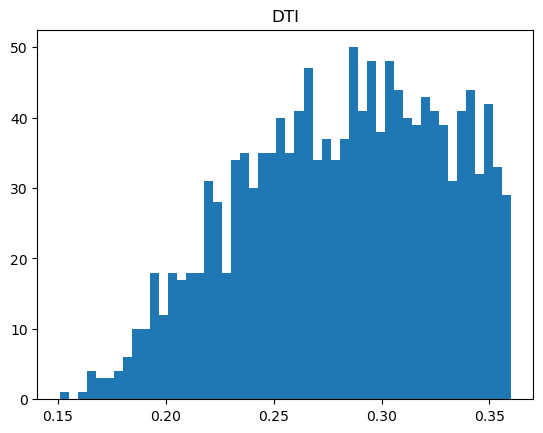

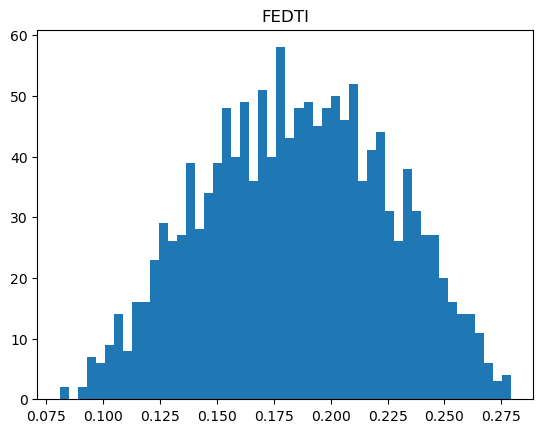

In [62]:
ltv_ristDF.describe()

#Histograms for each column
for col in ltv_ristDF.columns:
    plt.hist(ltv_ristDF[col], bins=50)
    plt.title(col)
    plt.show()

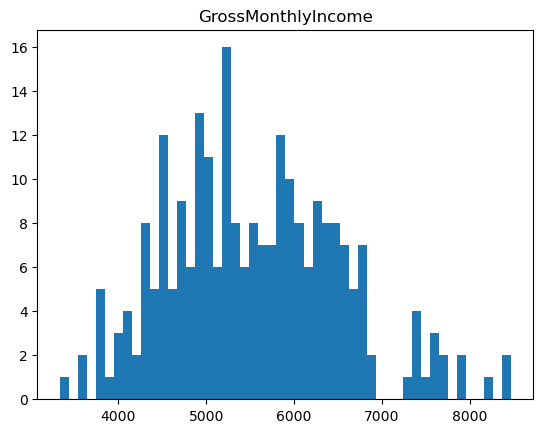

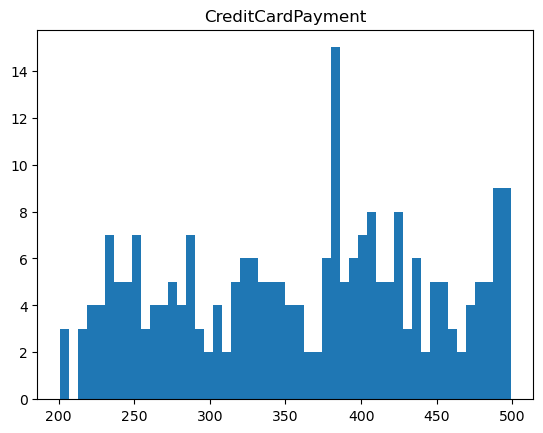

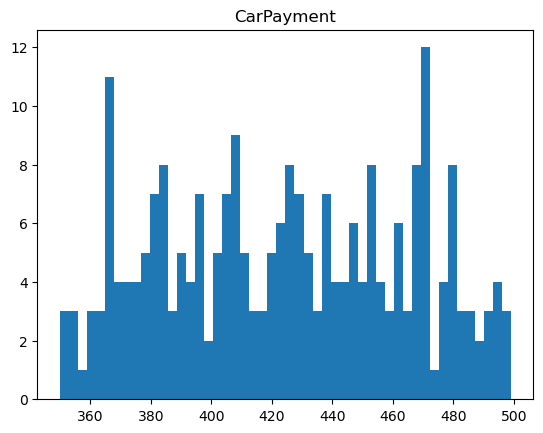

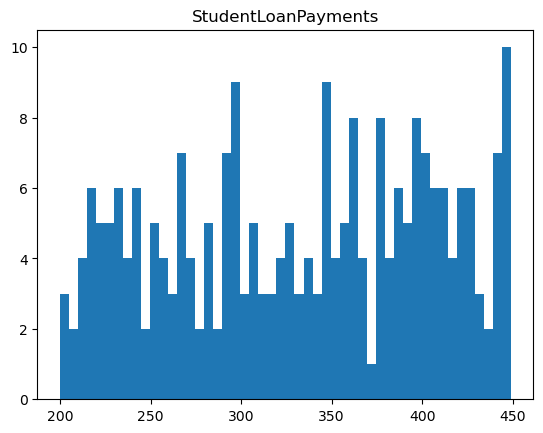

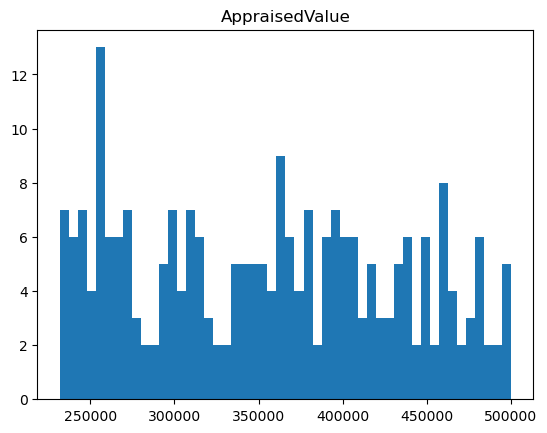

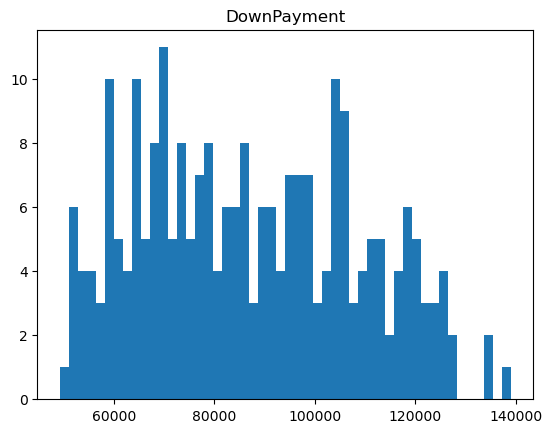

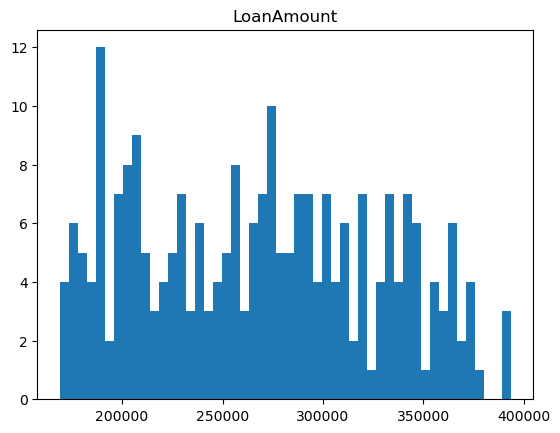

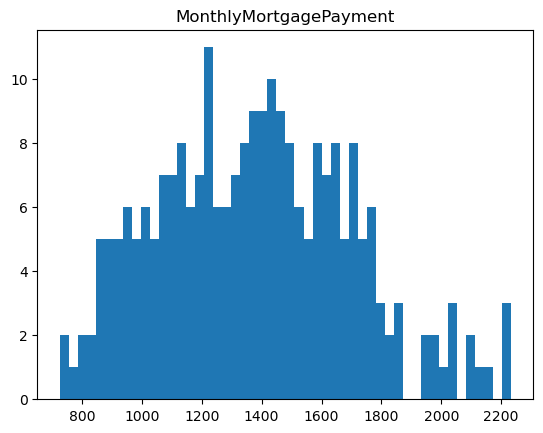

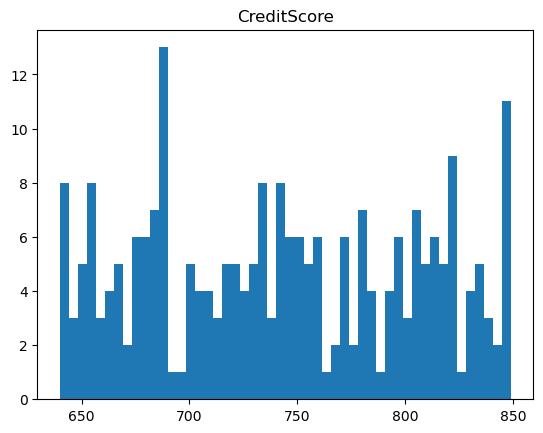

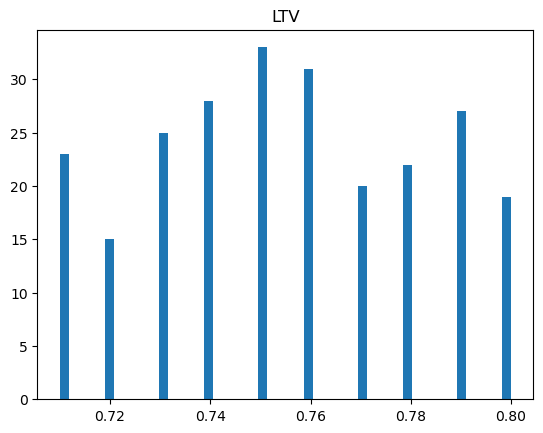

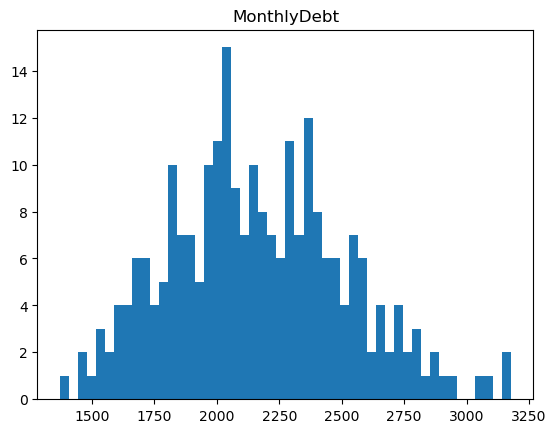

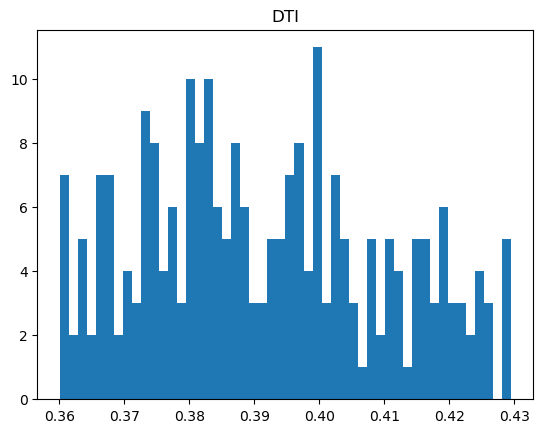

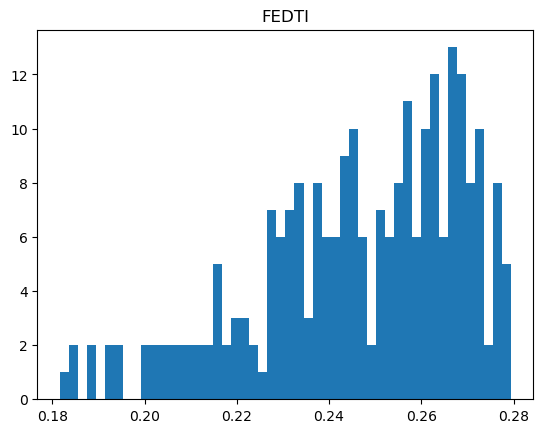

In [61]:
dti_riskDF.describe()

#Histograms for each column
for col in dti_riskDF.columns:
    plt.hist(dti_riskDF[col], bins=50)
    plt.title(col)
    plt.show()